In [1]:
# Tiina Manninen
# Implementation of astrocyte model by Lavrentovich and Hemkin (2008)
# Lavrentovich, M. and Hemkin, S. (2008). A mathematical model of spontaneous 
# calcium (II) oscillations in astrocytes. J. Theor. Biol. 251, 553–560.
# Corrigendum available: Lavrentovich, M. and Hemkin, S. (2009). J. Theor. Biol. 260, 332.

# Model implemented and ran using Jupyter Notebook.

# Model code used in publication: Manninen, T., Havela, R., and Linne, M.-L. (2017). 
# Reproducibility and comparability of computational models for astrocyte calcium excitability.
# Front. Neuroinform.

import numpy as np

class ModelSystem:
    def __init__(self, params):
        self.params = params
    
    def computeDeriv(self, state, t):
        Ca, Ca_ER, IP3 = state
        modelPar = self.params
        
        # Intermediate variables
        v_SERCA = modelPar.v_M2 * Ca ** 2 / (Ca ** 2 + modelPar.k_2 ** 2)
        v_PLC = modelPar.v_p * Ca ** 2 / (Ca ** 2 + modelPar.k_p ** 2)
        v_CICR = 4 * modelPar.v_M3 * modelPar.k_CaA ** modelPar.n * Ca ** modelPar.n \
                    / ( (Ca ** modelPar.n + modelPar.k_CaA ** modelPar.n) \
                    * (Ca ** modelPar.n + modelPar.k_CaI ** modelPar.n) )\
                * IP3 ** modelPar.m \
                    / ( (IP3 ** modelPar.m + modelPar.k_IP3 ** modelPar.m) )\
                * (Ca_ER - Ca)
                
        # dx/dt 
        dCa_per_dt = modelPar.v_in - modelPar.k_out * Ca + v_CICR - v_SERCA \
                    + modelPar.k_f * (Ca_ER - Ca)
        dCa_ER_per_dt = v_SERCA - v_CICR - modelPar.k_f * (Ca_ER - Ca)
        dIP3_per_dt = v_PLC - modelPar.k_deg * IP3
        
        deriv = [dCa_per_dt, dCa_ER_per_dt, dIP3_per_dt]
        return deriv   

In [2]:
class ModelParameters:
    k_2 = 0.1     # uM
    k_CaA = 0.15  # uM 
    k_CaI = 0.15  # uM
    k_deg = 0.08  # 1/s
    k_f = 0.5     # 1/s
    k_IP3 = 0.1   # uM
    k_out = 0.5   # 1/s
    k_p = 0.3     # uM
    m = 2.2
    n = 2.02
    v_in = 0.05   # uM/s 
    v_M2 = 15     # uM/s 
    v_M3 = 40     # 1/s
    v_p = 0.05    # uM/s

In [3]:
params = ModelParameters()
mySys = ModelSystem(params)

In [4]:
from scipy.integrate import odeint
initial = [0.1, 1.5, 0.1] # uM

Tmax = 600
dt = 0.1
t = np.arange(0,Tmax,dt)

data = odeint(mySys.computeDeriv, initial, t)

Populating the interactive namespace from numpy and matplotlib


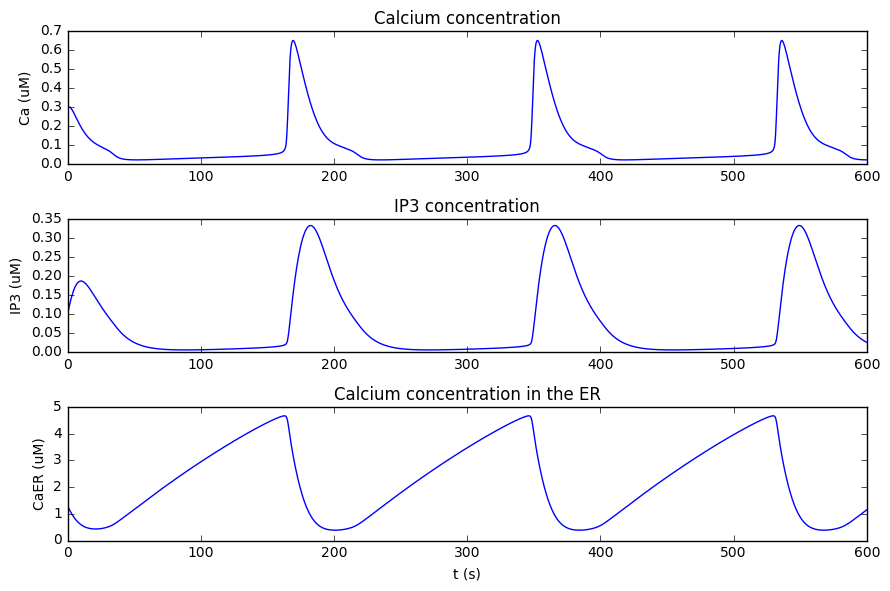

In [5]:
%pylab inline
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6), dpi=200)
plt.subplot(3,1,1)
plt.plot(t, data[:,0])
plt.title('Calcium concentration')
plt.ylabel('Ca (uM)')

plt.subplot(3,1,2)
plt.plot(t, data[:,2])
plt.title('IP3 concentration')
plt.ylabel('IP3 (uM)')

plt.subplot(3,1,3)
plt.plot(t, data[:,1])
plt.title('Calcium concentration in the ER')
plt.ylabel('CaER (uM)')
plt.xlabel('t (s)',)
plt.tight_layout()


np.savetxt('Lavrentovich2008.csv', (t, data[:,0], data[:,1], data[:,2]), delimiter=',')